# Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [2]:
# load data
raw_df = pd.read_csv("training_set.csv")

# display
display(raw_df.head())

# metadata
metadata_df = pd.read_csv("training_set_metadata.csv")

# dislplay
display(metadata_df.head())

# merge data
df = raw_df.merge(metadata_df, on = "object_id")

# display df
display(df.head())

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


,object_id,mjd,passband,flux,flux_err,detected,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,59750.4229,2,-544.810303,3.622952,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
1,615,59750.4306,1,-816.434326,5.553370,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
2,615,59750.4383,3,-471.385529,3.801213,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
3,615,59750.4450,4,-388.984985,11.395031,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
4,615,59752.4070,2,-681.858887,4.041204,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92


In [3]:
# shape
print("shape: ", df.shape)

# diferent targets
print("targets: ", df.target.unique().shape)

shape:  (1421705, 17)
targets:  (14,)


# Plot one light curve

,object_id,mjd,passband,flux,flux_err,detected,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,59750.4229,2,-544.810303,3.622952,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
1,615,59750.4306,1,-816.434326,5.553370,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
2,615,59750.4383,3,-471.385529,3.801213,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
3,615,59750.4450,4,-388.984985,11.395031,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
4,615,59752.4070,2,-681.858887,4.041204,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92


array([615])

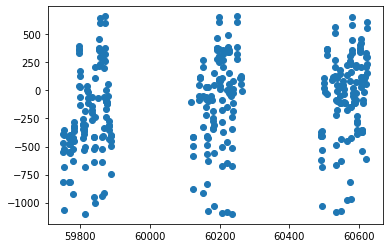

In [4]:
# get one light curve for one object id
one_light_curve = df[df["object_id"] == 615]

# display
display(one_light_curve.head())
display(one_light_curve.object_id.unique())

# Plot light curve
fig, ax = plt.subplots()
ax.scatter(one_light_curve["mjd"], one_light_curve["flux"])

# Select variables with which we will work

In [5]:
# getting only useful features
light_curves = df[["object_id", "mjd", "passband", "flux", "flux_err", "target"]]

# display
display(light_curves.head())

# check shape
print("shape of dataframe: ", light_curves.shape)

,object_id,mjd,passband,flux,flux_err,target
0,615,59750.4229,2,-544.810303,3.622952,92
1,615,59750.4306,1,-816.434326,5.553370,92
2,615,59750.4383,3,-471.385529,3.801213,92
3,615,59750.4450,4,-388.984985,11.395031,92
4,615,59752.4070,2,-681.858887,4.041204,92


shape of dataframe:  (1421705, 6)


# Feature extraction

In [6]:
import feets.preprocess

## Select features

In [7]:
# features to select
feature_names = [
    "Amplitude",
    "AndersonDarling",
    "MaxSlope",
    "Mean",
    "Meanvariance",
    "MedianAbsDev",
    "Rcs",
    "Skew",
    "Std",
]

#print features names
print("featuers: ", feature_names)

featuers:  ['Amplitude', 'AndersonDarling', 'MaxSlope', 'Mean', 'Meanvariance', 'MedianAbsDev', 'Rcs', 'Skew', 'Std']


## Computer features (using feets library)

In [29]:
from tqdm import tqdm_notebook

# get objects id
objects_ids = light_curves["object_id"].unique()

# print values
print("objects id: ", objects_ids.shape)

# select the passband
passband = 0

# store features values
features_values = np.zeros((len(objects_ids), len(feature_names)))

# print("shape of features values: ", features_values.shape)

# store the targets
targets = np.zeros(len(objects_ids))

# iterat through each object di
for index, object_id in (enumerate(tqdm_notebook(objects_ids))):

    # create a mask to filter by object id
    mask1 = light_curves["object_id"] == object_id
    
    # create a mask to filter by passband
    mask2 = light_curves["passband"] == passband
    
    # filter the data frame
    lc = light_curves[(mask1 & mask2)]
    
    # get data in correct ormat to feets library
    lc_data = [lc.mjd, lc.flux, lc.flux_err]
    
    # feature extraction
    fs = feets.FeatureSpace(only = feature_names, data = ["time", "magnitude", "error"])
    
    # compute features
    features, values = fs.extract(*lc_data)
    
    # store the values in arrays
    features_values[index, :] = values
    
    # store the target
    targets[index] = lc.iloc[0, -1]

objects id:  (7848,)


/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

In [32]:
# check arrays
print("feautes array: ", features_values.shape)

# check the targets array
print("targes array: ", targets.shape)

feautes array:  (7848, 9)
targes array:  (7848,)


## Build dataframe form computed feautes

In [40]:
# concatenate the array
features_values_with_targets = np.c_[objects_ids, features_values, targets]

print("shape: ", features_values_with_targets.shape)

# columns names
columns = ["object_id"] + feature_names + ["target"]

print("column names: ", columns)

# create new dataframe
features_light_curves = pd.DataFrame(data = features_values_with_targets, columns = columns)

# display
display(features_light_curves.head())

shape:  (7848, 11)
column names:  ['object_id', 'Amplitude', 'AndersonDarling', 'MaxSlope', 'Mean', 'Meanvariance', 'MedianAbsDev', 'Rcs', 'Skew', 'Std', 'target']


,object_id,Amplitude,AndersonDarling,MaxSlope,Mean,Meanvariance,MedianAbsDev,Rcs,Skew,Std,target
0,615.0,117.660498,1.000000,184.863919,-3.254554,-25.587479,79.958667,0.294085,0.125827,83.275842,92.0
1,713.0,11.347079,0.999936,11.418733,-2.720398,-2.596133,6.054598,0.436782,0.254446,7.062516,88.0
2,730.0,3.302110,0.362424,5.987811,-0.048080,-37.772702,1.205846,0.086680,0.349431,1.816127,42.0
3,745.0,9.511895,1.000000,13.567209,1.797523,2.416637,1.720855,0.282359,1.980815,4.343961,90.0
4,1124.0,4.585307,0.538771,6.992729,0.660948,3.542304,1.365366,0.206023,-0.324207,2.341279,90.0


# Supervised classification using logistic regression with 2 features

In [43]:
# format the data

# get data 
X = features_light_curves.loc[:, ["Amplitude", "AndersonDarling"]]

# check the shape
print("shape: ", X.shape)

# get the targes
y = features_light_curves.loc[:, ["target"]]

# check the shape
print("shape: ", y.shape)

shape:  (7848, 2)
shape:  (7848, 1)


In [49]:
# import libraies
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Ddefine mode
logistic_regression = LogisticRegression(
    multi_class = "auto"
)

# train the model
logistic_regression.fit(X, y)

/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# get F1 score
print("f1 score: ", f1_score(y, logistic_regression.predict(X), average = "weighted"))

# get accuracy
print("accuracy: ", logistic_regression.score(X, y))

f1 score:  0.1850560084226536
accuracy:  0.31995412844036697


# Prediction with LR

In [56]:
# new data
variable_1 = 117
variable_2 = 1.00

# defin arrays
variables = np.array([[variable_1, variable_2]])

# do the prediction
prediction = logistic_regression.predict(np.array(variables))

print("Prediction: ", prediction[0])

Prediction:  16.0


# Supervised classifier using logistic regression with more than 2 variables

In [61]:
print("Available feaures: ", feature_names)

# get the data
X = features_light_curves.loc[:, feature_names]

# check
print("shape: ", X.shape)

# get targets
y = features_light_curves.loc[:, ["target"]]

print("Shape: ", y.shape)

Available feaures:  ['Amplitude', 'AndersonDarling', 'MaxSlope', 'Mean', 'Meanvariance', 'MedianAbsDev', 'Rcs', 'Skew', 'Std']
shape:  (7848, 9)
Shape:  (7848, 1)


In [65]:
# define model
logistic_regression_multi = LogisticRegression(
    max_iter = 10000,
    multi_class = "auto",
    class_weight = "balanced",
    solver = "lbfgs",
    random_state = 0,
)

# train model
logistic_regression_multi.fit(X, y)

/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=0, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [67]:
# get the f1 score
print("f1 Score: ", f1_score(y, logistic_regression_multi.predict(X), average = "weighted"))

# get accuracy
print("accuracy: ", logistic_regression_multi.score(X, y))

f1 Score:  0.15696695268387087
accuracy:  0.19915902140672784


# Dimensionality reduction using PCA (Unsupervised learnig)

In [93]:
# import library
from sklearn.decomposition import PCA

# get data to transform
X = features_light_curves[feature_names]

# print("shape: ", X.shape)

# define number of components
n_components = 3

# define pca model
pca = PCA(n_components = n_components)

# transfor the data using PCA
principal_components = pca.fit_transform(X)

# check 
# print("shape: ", principal_components.shape)

# createa a DF
pca_df = pd.DataFrame(data = principal_components)

# check
# print("shape: ", pca_df.shape)

# add object id
pca_df["object_id"] = features_light_curves["object_id"].values

# targets
pca_df["target"] = features_light_curves["target"].values

# dispay
display(pca_df.head())

,0,1,2,object_id,target
0,-274.735506,-111.728990,-29.438882,615.0,92.0
1,-482.339620,-18.060015,-6.506988,713.0,88.0
2,-494.000291,-17.651737,-41.688237,730.0,42.0
3,-484.673868,-21.028289,-1.505744,745.0,90.0
4,-492.282678,-17.858165,-0.374421,1124.0,90.0


<BarContainer object of 3 artists>

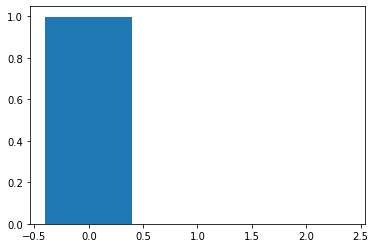

In [94]:
# ploting explained variance
fig, ax = plt.subplots()
ax.bar(np.arange(n_components), pca.explained_variance_ratio_)

# Supervised classification with logistic regression using PCA data

In [96]:
# import libraries
from sklearn.linear_model import LogisticRegression

# define model
logistic_regression_PCA = LogisticRegression(
    multi_class = "auto",
)

# train the mode
logistic_regression_PCA.fit(principal_components, y)

/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
# get f1 
print("F1 score: ", f1_score(y, logistic_regression_PCA.predict(principal_components), average = "weighted"))

# get accuracy
print("accuracy: ", logistic_regression_PCA.score(principal_components, y))

F1 score:  0.18112081033154354
accuracy:  0.31982670744138636
